<a href="https://colab.research.google.com/github/mintra-tippayaratsontorn/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. ช่วงเช้าหรือช่วงบ่ายมีเครื่องบินขาเข้ามากกว่ากัน

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


In [1]:
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
flights = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/Mini Exam/flights.csv')
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [5]:
flights.isnull().any()  # เช็ค missing

วันในเดือน            False
วันในสัปดาห์          False
สายการบิน             False
รหัสสนามบินต้นทาง     False
รหัสสนามบินปลายทาง    False
ความล่าช้าขาออก       False
ความล่าช้าขาเข้า      False
dtype: bool

In [6]:
airports = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/Mini Exam/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [7]:
airports.isnull().any()  # เช็ค missing

รหัสสนามบิน    False
เมือง          False
รัฐ            False
ชื่อสนามบิน    False
dtype: bool

In [8]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [9]:
gen_exams('623020041-2')

รหัสนักศึกษา 623020041-2 ทำข้อ 2 และ 3


# 2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์

ดูเที่ยวบินขาออกจาก รหัสสนามบินต้นทางและวันในสัปดาห์	

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
# จัดกลุ่มด้วย 'รหัสสนามบินต้นทาง' และ count
data_flights = flights.groupby('วันในสัปดาห์')[['รหัสสนามบินต้นทาง']].count()
data_flights

,รหัสสนามบินต้นทาง
วันในสัปดาห์,
1,407837
2,397594
3,403072
4,406563
5,396387
6,318537
7,372228


In [12]:
# reset index เพื่อเอา index ไปใช้งานต่อ
data_flights.reset_index(inplace=True)
data_flights

,วันในสัปดาห์,รหัสสนามบินต้นทาง
0,1,407837
1,2,397594
2,3,403072
3,4,406563
4,5,396387
5,6,318537
6,7,372228


No handles with labels found to put in legend.


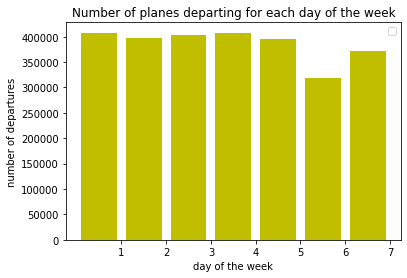

In [13]:
plt.bar(np.arange(len(data_flights.iloc[:,1])), data_flights.iloc[:,1],color='y')

plt.xlabel('day of the week')
plt.ylabel('number of departures')
plt.title('Number of planes departing for each day of the week')
plt.xticks(np.arange(len(data_flights.iloc[:,0]))+0.5, data_flights.iloc[:,0])
plt.legend();

# 3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด

In [14]:
# จัดกลุ่มด้วย 'สายการบิน' และ count
data_flights2 = flights.groupby('สายการบิน')[['วันในเดือน']].count()
data_flights2

,วันในเดือน
สายการบิน,
9E,80031
AA,289855
AS,68555
B6,121906
DL,381657
EV,157928
F9,35738
FL,92702
HA,17432


In [15]:
# reset index เพื่อเอา index ไปใช้งานต่อ
data_flights2.reset_index(inplace=True)
data_flights2

,สายการบิน,วันในเดือน
0,9E,80031
1,AA,289855
2,AS,68555
3,B6,121906
4,DL,381657
5,EV,157928
6,F9,35738
7,FL,92702
8,HA,17432
9,MQ,113212


In [16]:
# เรียงลำดับจากมากไปน้อย ตามจำนวนเที่ยวบิน ดูจากวันในเดือน
data_flights2_sort = data_flights2.sort_values(by=['วันในเดือน'],ascending=False)
data_flights2_sort

,สายการบิน,วันในเดือน
14,WN,575739
4,DL,381657
1,AA,289855
11,UA,286418
12,US,233321
10,OO,160164
5,EV,157928
3,B6,121906
9,MQ,113212
7,FL,92702


In [17]:
# สายการบินที่มีเที่ยวบินมากที่สุด
data_flights2_sort_max = data_flights2.sort_values(by=['วันในเดือน'],ascending=False)
data_flights2_sort_max.iloc[:1,:]

,สายการบิน,วันในเดือน
14,WN,575739


In [18]:
# สายการบินที่มีเที่ยวบินน้อยที่สุด
data_flights2_sort_min = data_flights2.sort_values(by=['วันในเดือน'],ascending=False)
data_flights2_sort_min.iloc[-1:,:]

,สายการบิน,วันในเดือน
8,HA,17432


สรุป
* สายการบินที่มีเที่ยวบินมากที่สุด คือ สายการบิน WN มีจำนวนเที่ยวบิน 575739 เที่ยวบิน
* สายการบินที่มีเที่ยวบินน้อยที่สุด คือ สายการบิน HA มีจำนวนเที่ยวบิน 17432 เที่ยวบิน

*** นับเที่ยวบินจาก column วันในเดือน

ตั้งโจทย์เอง
# สายการบินไหนมีเที่ยวบินมากที่สุด 5 อันดับแรก

In [19]:
# จัดกลุ่มด้วย 'สายการบิน' และ count
data_flights3 = flights.groupby('สายการบิน')[['วันในเดือน']].count()
data_flights3

,วันในเดือน
สายการบิน,
9E,80031
AA,289855
AS,68555
B6,121906
DL,381657
EV,157928
F9,35738
FL,92702
HA,17432


In [20]:
# reset index เพื่อเอา index ไปใช้งานต่อ
data_flights3.reset_index(inplace=True)
data_flights3

,สายการบิน,วันในเดือน
0,9E,80031
1,AA,289855
2,AS,68555
3,B6,121906
4,DL,381657
5,EV,157928
6,F9,35738
7,FL,92702
8,HA,17432
9,MQ,113212


In [21]:
# เรียงลำดับจากมากไปน้อย ตามจำนวนเที่ยวบิน ดูจากวันในเดือน
data_flights3_sort = data_flights3.sort_values(by=['วันในเดือน'],ascending=False)
data_flights3_sort

,สายการบิน,วันในเดือน
14,WN,575739
4,DL,381657
1,AA,289855
11,UA,286418
12,US,233321
10,OO,160164
5,EV,157928
3,B6,121906
9,MQ,113212
7,FL,92702


In [22]:
# สายการบินไหนมีเที่ยวบินมากที่สุด 5 อันดับแรก
data_flights3_sort_max = data_flights3.sort_values(by=['วันในเดือน'],ascending=False) # groupby เลือก/จัดกลุ่ม , sort_values เรียงข้อมูลจากมากไปน้อย
data_flights3_sort_max.iloc[:5,:]

,สายการบิน,วันในเดือน
14,WN,575739
4,DL,381657
1,AA,289855
11,UA,286418
12,US,233321


สรุป สายการบินที่มีเที่ยวบินมากที่สุด 5 อันดับแรก
1.	WN	จำนวนเที่ยวบิน 575739 เที่ยวบิน
2.	DL	จำนวนเที่ยวบิน 381657 เที่ยวบิน
3.	AA	จำนวนเที่ยวบิน 289855 เที่ยวบิน
4.	UA	จำนวนเที่ยวบิน 286418 เที่ยวบิน
5.	US	จำนวนเที่ยวบิน 233321 เที่ยวบิน